# geoPandas
 - centroid
  - sjoin
   - overlay

In [3]:
# Importando bibliotecas necessárias
import geopandas as gpd
import os
import matplotlib
import matplotlib.pyplot as plt
import pygeos

In [3]:
def carregar_dados(caminho):
    return gpd.read_file(caminho)

In [ ]:
# ----
path = os.getcwd()+'//dados//municipios.shp'
# municipios = gpd.read_file(path)
municipios = carregar_dados(path)
path2 = os.getcwd()+'//dados//aeroportos.shp'
# aeroportos = gpd.read_file(path2)
aeroporto = carregar_dados(path2)
aeroportos.plot()

C:\Users\eduar\AppData\Local\Temp\ipykernel_16172\2376743837.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios_pr_centro = municipios_pr.centroid


<Axes: >

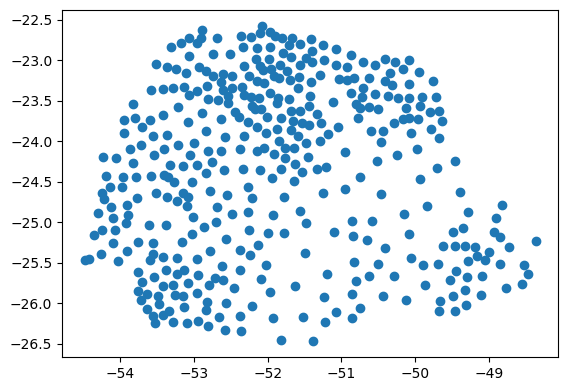

In [5]:
#municipios.columns
municipios_pr = municipios[municipios['uf']=='PR']
municipios_pr_centro = municipios_pr.centroid
municipios_pr_centro.plot()

<Axes: >

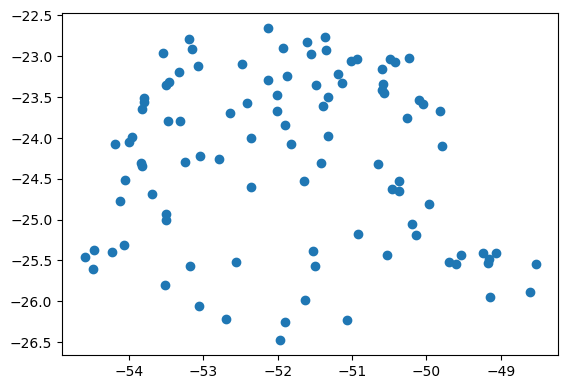

In [6]:
aeroportos_pr=gpd.sjoin(aeroportos,municipios_pr,predicate='intersects')
aeroportos_pr.plot()

(array([43.,  0., 37.,  0.,  0., 12.,  0.,  6.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

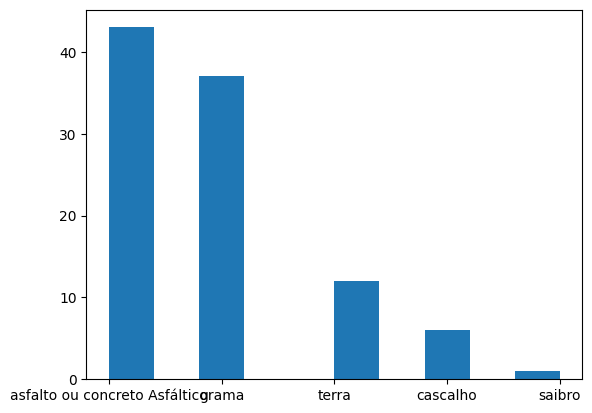

In [7]:
plt.hist(x=aeroportos_pr['pavimento'])

<Axes: >

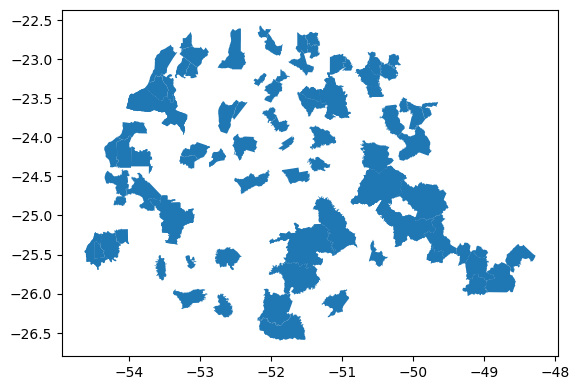

In [8]:
municiposcomaero = gpd.sjoin(municipios_pr,aeroportos, predicate='contains')
municiposcomaero.plot()

<Axes: >

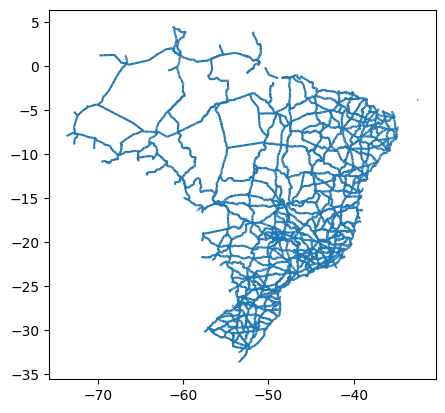

In [9]:
path3 = os.getcwd()+'//dados//rodovias.shp'
rodovias = gpd.read_file(path3)
rodovias.plot()

<Axes: >

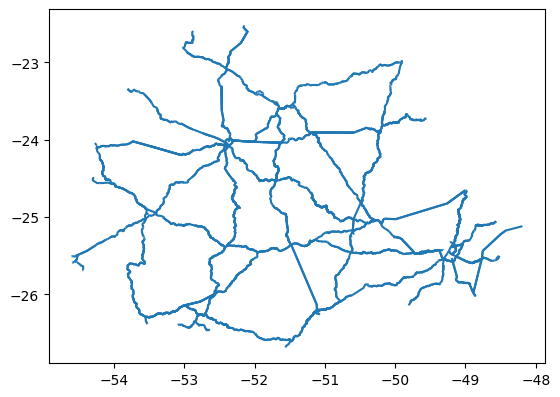

In [11]:
rodovias_pr = gpd.sjoin(rodovias, municipios_pr, predicate='intersects')
rodovias_pr.plot()

<Axes: >

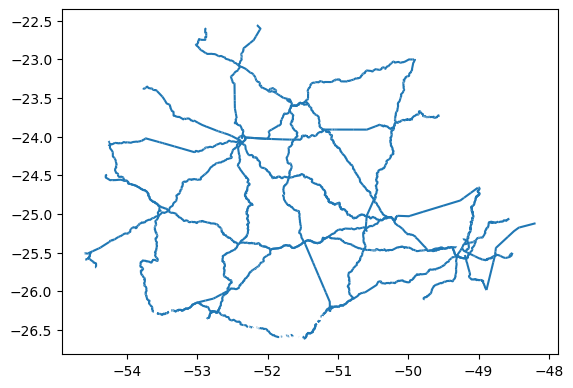

In [15]:
rodovias_pr = gpd.overlay(rodovias,municipios_pr, how = 'intersection')
rodovias_pr.plot()